### Visual and check icesat2 data on the study region.

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
root_proj = '/home/xin/Desktop/developer-luo/Glacier-in-SETP'
os.chdir(root_proj)


In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader


In [4]:
path_hma_vec = 'data/boundary/hma_bolch2019.gpkg'
path_setp_vec = 'data/boundary/setp_zhao2022.gpkg'


In [10]:
### Read full-region/one-year ATL06 data
with h5py.File('data/icesat/ATL06-readout/2020/tiles_all_month/ATL06_2020.h5','r') as f_atl06:
    atl06_lat_setp_month   = f_atl06['h_lat'][:]
    atl06_lon_setp_month   = f_atl06['h_lon'][:]
    atl06_h_setp_month = f_atl06['h_li'][:]
    atl06_time_setp_month = f_atl06['t_dyr'][:]
    atl06_beam_setp_month = f_atl06['beam_type'][:]
    atl06_spot_setp_month = f_atl06['spot'][:]    # 1->strong; 0->weak
    atl06_rgt_setp_month = f_atl06['rgt'][:]    # 1->strong; 0->weak
    print(f_atl06.keys())


<KeysViewHDF5 ['beam_type', 'cycle', 'h_lat', 'h_li', 'h_lon', 'orbit_type', 'rgt', 'spot', 't_dyr']>


In [11]:
### Read one-tile/one-year ATL06 data
with h5py.File('data/icesat/atl06-readout/2020/tile-27-91/ATL06_2020.h5','r') as f_atl06_tile:
    atl06_lat_tile   = f_atl06_tile['h_lat'][:]
    atl06_lon_tile   = f_atl06_tile['h_lon'][:]
    atl06_h_tile = f_atl06_tile['h_li'][:]
    atl06_time_tile = f_atl06_tile['t_dyr'][:]
    atl06_beam_tile = f_atl06_tile['beam_type'][:]
    atl06_spot_tile = f_atl06_tile['spot'][:]    # 1->strong; 0->weak
    atl06_rgt_tile = f_atl06_tile['rgt'][:]    # 1->strong; 0->weak
    print(f_atl06_tile.keys())


<KeysViewHDF5 ['beam_type', 'cycle', 'h_lat', 'h_li', 'h_lon', 'orbit_type', 'rgt', 'spot', 't_dyr']>


### 1. Global view for atl06 data (study region/one-month), one-year data is too much.

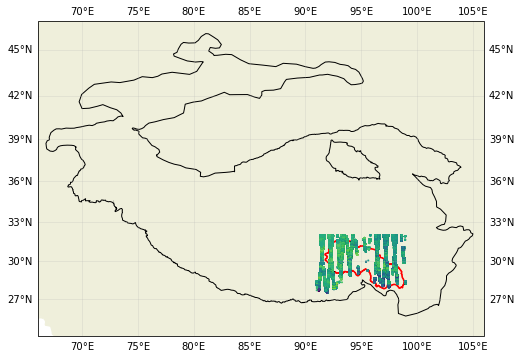

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=88.5))

ax.set_extent([66, 106, 24.0, 45.0])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
## 1. tibet boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_hma_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='Black', linewidth=1, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 2. setp boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 3. icesat-2 atl06 data
ax.scatter(x=atl06_lon_setp_month, y=atl06_lat_setp_month, c=atl06_h_setp_month, \
                                          s=1, transform=ccrs.PlateCarree(), zorder=0)


### 2. Local view (study region/one-month)

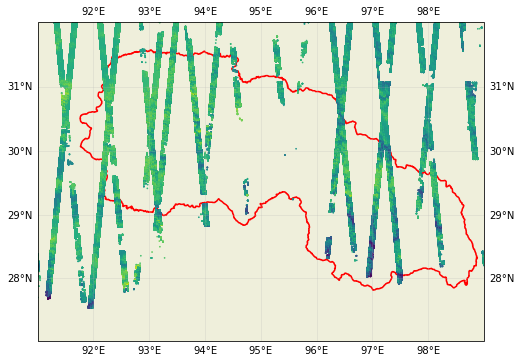

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([91, 99, 27, 32])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)

## 1. wkunlun boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 2. icesat-2 atl06 data
ax.scatter(x=atl06_lon_setp_month, y=atl06_lat_setp_month, c=atl06_h_setp_month, \
                                        s=0.5, transform=ccrs.PlateCarree(), zorder=0)


### 2. Local view (one-tile/one-year)

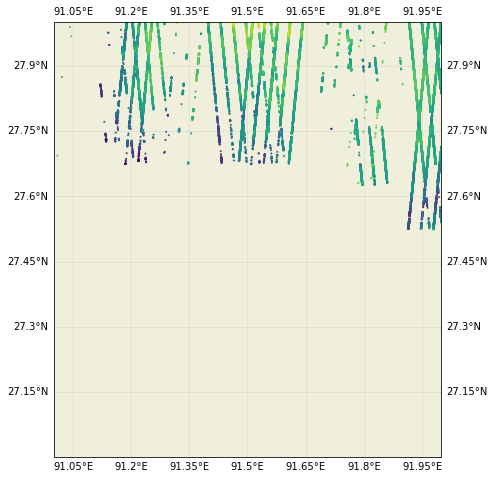

In [16]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([91, 92, 27, 28])
# ax.set_extent([91, 99, 27, 32])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)

## 1. wkunlun boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 2. icesat-2 atl06 data
ax.scatter(x=atl06_lon_tile, y=atl06_lat_tile, c=atl06_h_tile, \
                                      s=1, transform=ccrs.PlateCarree(), zorder=0)
